# **Regressão Linear: Análise da influência de variáveis na determinação do valor final do carro.**

In [1]:
#Importando as bibliotecas necessárias:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
caminho = '/content/ford.csv'
df = pd.read_csv(caminho)
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17960,Fiesta,2016,7999,Manual,31348,Petrol,125,54.3,1.2
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6




#Objetivo:Entender como as variáveis influenciam no preço de venda

In [3]:
#Analisando os modelos de carro da marca Ford:

df.model.value_counts(dropna=False)

 Fiesta                   6557
 Focus                    4588
 Kuga                     2225
 EcoSport                 1143
 C-MAX                     543
 Ka+                       531
 Mondeo                    526
 B-MAX                     355
 S-MAX                     296
 Grand C-MAX               247
 Galaxy                    228
 Edge                      208
 KA                        199
 Puma                       80
 Tourneo Custom             69
 Grand Tourneo Connect      59
 Mustang                    57
 Tourneo Connect            33
 Fusion                     16
 Streetka                    2
 Ranger                      1
 Escort                      1
 Transit Tourneo             1
Name: model, dtype: int64

In [4]:
#Avaliando o tipo do câmbio de cada carro:

df.transmission.value_counts(dropna=False)

Manual       15517
Automatic     1361
Semi-Auto     1087
Name: transmission, dtype: int64

In [5]:
#Avaliando o tipo de combustível utilizado em cada carro:

df.fuelType.value_counts(dropna=False)


Petrol      12178
Diesel       5762
Hybrid         22
Electric        2
Other           1
Name: fuelType, dtype: int64

In [6]:
# O método one hot visa identificar qual o padrão do modelo. As colunas que não forem identificadas no df abaixo, significa que o modelo escolheu como padrão.

df_onehot=pd.get_dummies(df, drop_first = True)
df_onehot

,year,price,mileage,tax,mpg,engineSize,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,...,model_ Streetka,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,12000,15944,150,57.7,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2018,14000,9083,150,57.7,1.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2017,13000,12456,150,57.7,1.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,2019,17500,10460,145,40.3,1.5,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,2019,16500,1482,145,48.7,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17960,2016,7999,31348,125,54.3,1.2,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
17961,2017,8999,16700,150,47.1,1.4,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
17962,2014,7499,40700,30,57.7,1.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
17963,2015,9999,7010,20,67.3,1.6,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [36]:
for col in df_onehot.columns:
    print(col)

year
price
mileage
tax
mpg
engineSize
model_ C-MAX
model_ EcoSport
model_ Edge
model_ Escort
model_ Fiesta
model_ Focus
model_ Fusion
model_ Galaxy
model_ Grand C-MAX
model_ Grand Tourneo Connect
model_ KA
model_ Ka+
model_ Kuga
model_ Mondeo
model_ Mustang
model_ Puma
model_ Ranger
model_ S-MAX
model_ Streetka
model_ Tourneo Connect
model_ Tourneo Custom
model_ Transit Tourneo
transmission_Manual
transmission_Semi-Auto
fuelType_Electric
fuelType_Hybrid
fuelType_Other
fuelType_Petrol


Analisando as colunas do df_onehot, nota-se que o carro padrão é o modelo B-MAX (pois não se encontra na lista acima).

In [7]:
#variável preditiva e variável resposta:

X= df_onehot.drop('price', axis = 1)
y = df_onehot.price

Analisando graficamente a variável resposta:

(array([7.600e+01, 2.250e+02, 4.580e+02, 1.741e+03, 2.979e+03, 3.621e+03,
        2.386e+03, 1.874e+03, 1.553e+03, 1.447e+03, 8.200e+02, 3.190e+02,
        1.580e+02, 9.700e+01, 6.700e+01, 4.500e+01, 2.500e+01, 3.000e+01,
        1.300e+01, 6.000e+00, 8.000e+00, 4.000e+00, 5.000e+00, 3.000e+00,
        1.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([  495.        ,  2311.66666667,  4128.33333333,  5945.        ,
         7761.66666667,  9578.33333333, 11395.        , 13211.66666667,
        15028.33333333, 16845.        , 18661.66666667, 20478.33333333,
        22295.        , 24111.66666667, 25928.33333333, 27745.        ,
        29561.66666667, 31378.33333333, 33195.        , 35011.66666667,
        36828.33333333, 38645.        , 40461.66666667, 42278.33333333,
        44095.        , 45911.66666667, 47728.33333333, 49545.        ,
        51361.66666667, 53178.33333333, 54995.        ]),
 <a list of 30 Patch objects>)

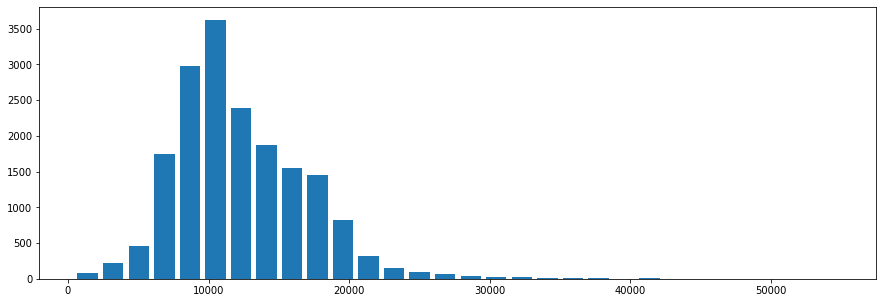

In [8]:
plt.figure(figsize=(15,5))
plt.hist(y, bins = 30, rwidth=0.8)

Analisando os outliers de uma forma melhor:


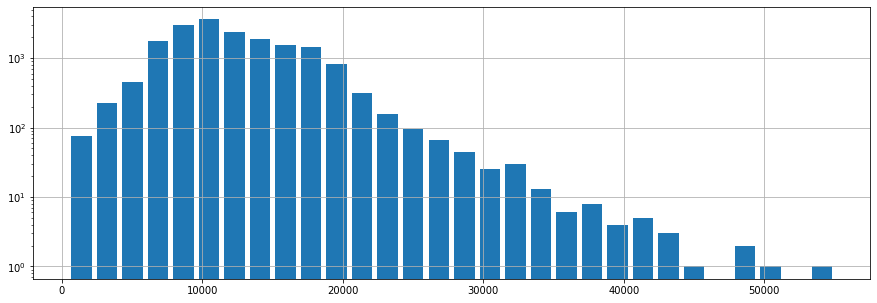

In [9]:
plt.figure(figsize=(15,5))
plt.hist(y, bins = 30, rwidth = .8, log=True)
plt.grid()

Treinando o modelo

In [10]:
from sklearn.model_selection import train_test_split 

X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=.3, random_state = 61658)

In [ ]:
X_tr.shape, X_ts.shape

((12575, 33), (5390, 33))

# Normalizando as variáveis para poder compará-las.

In [11]:
X_tr_s = X_tr.copy()
X_ts_s = X_ts.copy()

from sklearn .preprocessing import StandardScaler

cols_to_scale = [
    'year',
    'mileage',
    'engineSize',
]
scalers = {}

for col in cols_to_scale:
    scalers[col] = StandardScaler()
    scalers[col].fit(X_tr_s[[col]])

    X_tr_s.loc[:,col] = scalers[col].transform(X_tr_s[[col]])
    X_ts_s.loc[:,col] = scalers[col].transform(X_ts_s[[col]])

In [12]:
X_tr_s

,year,mileage,tax,mpg,engineSize,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,model_ Fiesta,...,model_ Streetka,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
9846,1.054137,-1.109143,145,38.2,1.515942,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4834,-0.421131,0.072954,0,65.7,-0.825227,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
4613,0.562381,-0.419509,145,58.9,-0.825227,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
14543,0.562381,0.263101,145,74.3,0.345357,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
470,1.054137,-0.704447,145,54.3,0.345357,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5252,0.070625,-0.735976,20,61.4,-0.825227,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4392,-0.421131,2.266586,125,60.1,1.515942,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
12778,1.054137,-1.034961,145,55.4,-0.825227,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
7775,0.070625,-0.872088,165,44.1,0.579474,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


Da tabela cima, conclui-se que o carro padrão tem câmbio automático e combustível padrão, o diesel (estas colunas não aparecem, ou seja, ao utilizar o método Onehot, o modelo automaticamente institui como padrão o câmbio automático e combustível padrão o diesel).

**Ajuste do modelo:**

In [13]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(
    fit_intercept=True,
    normalize=False,
    n_jobs=3,
)

lr.fit(X_tr_s, y_tr)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


LinearRegression(n_jobs=3, normalize=False)

In [15]:
y_pred=lr.predict(X_ts_s)

# **Validando o modelo** MAE e MSE:

In [16]:
# Analisando o  MSE:

from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_ts,y_pred))

2029.4460876157227

In [17]:
#Analisando o MAE:

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_ts,y_pred)

1368.1963747027362

**Analisando graficamente:**


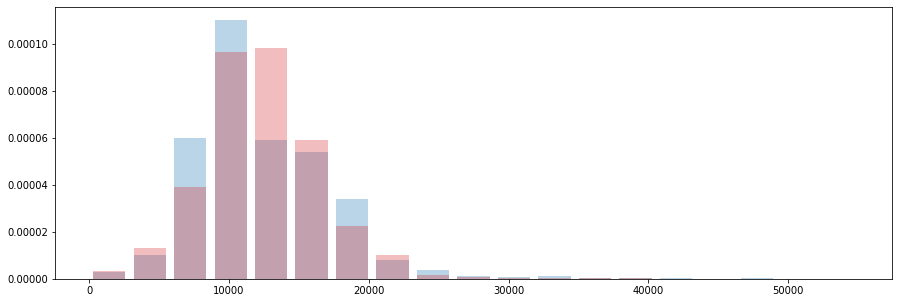

In [18]:
plt.figure(figsize=(15,5))

M = y_ts.max()

plt.hist(y_ts,bins=np.linspace(0,M,20),rwidth = 0.8, alpha = 0.3, color = 'C0', density = True)
plt.hist(y_pred, bins = np.linspace(0,M,20), rwidth=0.8, alpha = 0.3, color = 'C3', density = True);

O modelo tem tendência em concentrar a precificação em U$10.000.

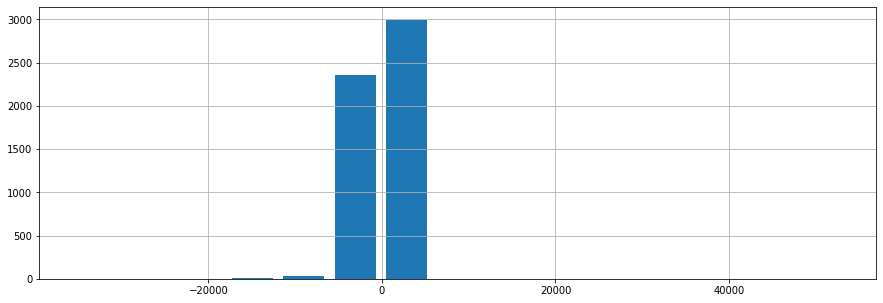

In [19]:
#Analisando os erros:

plt.figure(figsize=(15,5))

plt.hist(y_pred-y_ts,bins=15, rwidth = 0.8, density = False)
plt.grid()

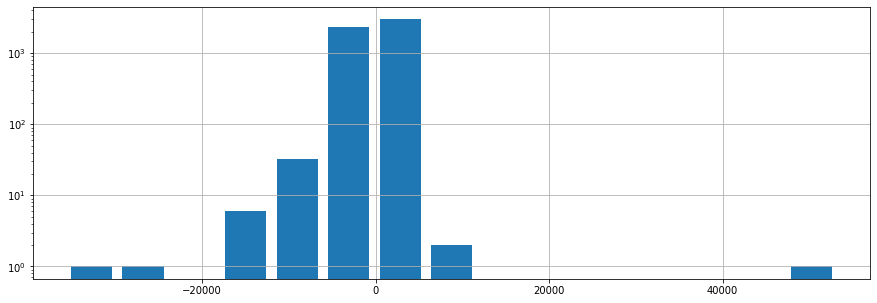

In [20]:
#Analisando os erros na escala logarítmica:

plt.figure(figsize=(15,5))

plt.hist(y_pred - y_ts, bins=15, rwidth=0.8, density = False, log=True)
plt.grid()

Analisando os gráfico acima, nota-se que o modelo tende a fazer predições menores do que o valor real dos veículos.

**Interpretando o modelo:**

In [21]:
lr.intercept_

15367.401962984834

In [22]:
#Analisando o peso que o modelo dá para cada variável: 
lr.coef_

array([ 2.30357735e+03, -1.18643133e+03, -1.07684178e+00, -8.18180869e+01,
        1.12837041e+03,  1.17263626e+03,  1.66629850e+03,  9.08032138e+03,
        1.54899441e+04,  1.21103735e+03,  3.23439018e+03,  4.21054053e+03,
        6.83145567e+03,  1.61386842e+03,  4.25871030e+03, -4.45796723e+02,
       -2.91636617e+03,  3.76079215e+03,  2.92456561e+03,  1.15216687e+04,
        8.03239467e+03,  5.57379367e+03,  6.46890573e+03,  5.41836128e+03,
        3.11374700e+03,  6.66526357e+03,  2.00290818e+03, -4.57353357e+02,
       -1.26190158e+02,  1.59498893e+03,  6.89219532e+03,  0.00000000e+00,
       -2.40491637e+02])

In [23]:
for col, coef in zip(X_tr.columns, lr.coef_):
    print(f'{col:50s} : {coef:7.3f}')

year                                               : 2303.577
mileage                                            : -1186.431
tax                                                :  -1.077
mpg                                                : -81.818
engineSize                                         : 1128.370
model_ C-MAX                                       : 1172.636
model_ EcoSport                                    : 1666.298
model_ Edge                                        : 9080.321
model_ Escort                                      : 15489.944
model_ Fiesta                                      : 1211.037
model_ Focus                                       : 3234.390
model_ Fusion                                      : 4210.541
model_ Galaxy                                      : 6831.456
model_ Grand C-MAX                                 : 1613.868
model_ Grand Tourneo Connect                       : 4258.710
model_ KA                                          : -445.797
model_ K

Assim, por exemplo, quanto maior o ano do carro (year), mais caro ele será (2303,5). De forma inversa, quanto maior a quilometragem do carro, menor o seu valor (-1186,4).

# A equação do preço é:

$$
y = \beta_0 + \beta_{ano} \cdot ano + \beta_{mileage} \cdot mileage + \beta_{engineSize} \cdot engineSize + \beta_{Trans.Manual} \cdot Trans.Manual + \beta_{Trans.Semi} \cdot Trans.Semi + \beta_{fuel.Petrol} \cdot fuel.Petrol
$$

$\beta_0$:

É o carro com todas variáveis zeradas.
 - Normalização
 - Método one-hot
   - câmbio automático
   - combustível diesel

# O carro padrão:





In [25]:
print( 'year', scalers [ 'year'].mean_, scalers['year'].scale_)
print( 'mileage', scalers [ 'mileage'].mean_, scalers['mileage'].scale_)
print( 'engineSize', scalers ['engineSize'].mean_, scalers['engineSize'].scale_)

year [2016.85638171] [2.03352861]
mileage [23435.95435388] [19506.00756208]
engineSize [1.35248509] [0.42713711]


O carro padrão tem as seguintes características:



*   Ano do carro: 2016
*   Quilometragem: 23435 milhas rodadas
*   Tamanho do motor: 1.35
*   Câmbio: automático
*   Combustível: Diesel
*   Preço: U$ 15367
*   Modelo: B-MAX



Analisando a variável mileage:

In [26]:
scalers [ 'mileage'].mean_, scalers['mileage'].scale_

(array([23435.95435388]), array([19506.00756208]))

Carros que têm exatamente 23435 milhas não sofrem impacto dessa variável. Mas, a cada 23435 milhas a mais, o carro encarece 1186 dólares, e se o carro possui 23435 milhas a menos, o carro é 1186 dólares mais barato.

**Analisando a variável Transmission:**

In [27]:
# Recapitulando: 

for col, coef in zip(X_tr.columns, lr.coef_):
    print(f'{col:50s} : {coef:7.3f}')

year                                               : 2303.577
mileage                                            : -1186.431
tax                                                :  -1.077
mpg                                                : -81.818
engineSize                                         : 1128.370
model_ C-MAX                                       : 1172.636
model_ EcoSport                                    : 1666.298
model_ Edge                                        : 9080.321
model_ Escort                                      : 15489.944
model_ Fiesta                                      : 1211.037
model_ Focus                                       : 3234.390
model_ Fusion                                      : 4210.541
model_ Galaxy                                      : 6831.456
model_ Grand C-MAX                                 : 1613.868
model_ Grand Tourneo Connect                       : 4258.710
model_ KA                                          : -445.797
model_ K

Carros automáticos não têm seu valor alterado (carro padrão). Já carros manuais, têm uma redução do valor predito em 457 dólares e carros semi-automáticos, tem uma diminuição no valor da predição de 126 dólares.

Analisando o combustível:
  Como já visto, o carro padrão tem combustível o diesel. Se o carro for elétrico, ele encarece 1594 dólares; se for híbrido, encarece 6892 dólares; gasolina, fica 240 dólares mais barato.

De acordo com o modelo, o B-MAX é o modelo padrão, mas se for escolhido o modelo Focus, o carro terá um acréscimo de 3234 dólares. Entretanto, se for um modelo KA, o carro ficará 445 dólares mais barato.